In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
def use_svg_display():
    matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize
set_figsize()

In [3]:
economy = pd.ExcelFile('./data/1.经济发展度2018-2022.xlsx')
economy_2018 = economy.parse('2018').iloc[:26, :6]
economy_2019 = economy.parse('2019').iloc[:26, :6]
economy_2020 = economy.parse('2020').iloc[:26, :6]
economy_2021 = economy.parse('2021').iloc[:26, :6]
economy_2022 = economy.parse('2022').iloc[:26, :6]
economy_2022

,城市,社会消费品零售总额（亿元）,人均GDP(元),一般公共预算收入（亿元）,一般公共预算支出（亿元）,第三产业占比
0,重庆,13939.7646,84961.894494,2237.45555,5144.50384,0.527180
1,成都,9233.2964,130295.723212,1661.97977,2380.90216,0.660435
2,上海,18043.1414,302720.072675,7608.59220,8970.43504,0.741217
3,北京,14837.9646,297885.780761,5807.73149,7666.24768,0.838585
4,天津,3762.2604,145894.559367,2096.09774,3354.31320,0.613025
5,广州,10102.3548,276479.130029,1844.69054,3214.53552,0.712609
6,石家庄,2496.1976,66659.547522,667.05144,1226.51536,0.593927
7,西安,4953.4732,112146.276947,838.02400,1568.99568,0.632243
8,哈尔滨,2375.5394,58026.377307,358.12799,1055.57312,0.647531
9,武汉,6781.4100,192983.548920,1545.49835,2357.79208,0.621040


In [4]:
economy = pd.concat([economy_2018, economy_2019, economy_2020, economy_2021, economy_2022], axis=0)
economy

,城市,社会消费品零售总额（亿元）,人均GDP(元),一般公共预算收入（亿元）,一般公共预算支出（亿元）,第三产业占比
0,重庆,10705.2000,63428.564713,2265.54000,4540.95000,0.526565
1,成都,6801.8000,103944.785068,1424.16000,1837.42000,0.541231
2,上海,14874.8000,246254.735431,7108.15000,8351.54000,0.709387
3,北京,14422.3000,240630.905655,5785.92000,7471.43000,0.830910
4,天津,4231.2000,123544.095486,2106.24000,3103.16000,0.625036
...,...,...,...,...,...,...
21,宁波,4639.8018,242182.765899,1686.95406,2068.86288,0.492498
22,大连,1905.8806,134462.279855,722.11040,1042.77320,0.508789
23,昆明,3379.6272,127995.060539,674.64848,987.56224,0.633673
24,深圳,9479.1038,578227.115391,4168.28830,4862.71408,0.625971


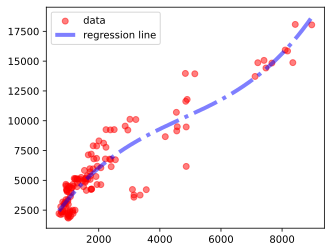

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
set_figsize((5, 4))
# 取出自变量（X）和因变量（y）
X = economy.iloc[:, 4].values.reshape(-1,1)
y = economy.iloc[:, 1].values.reshape(-1,1)

# 创建一个 PolynomialFeatures 对象，设置 degree=2 来获得二次多项式特征
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

# 建立一元线性回归模型
reg = LinearRegression().fit(X_poly, y)

# 画出数据点
plt.scatter(X, y, color='r', alpha=0.5, label='data')

# 画出回归线
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)

plt.plot(X_grid, reg.predict(poly.fit_transform(X_grid)), linestyle='-.', color='b', alpha=0.5, linewidth=4, label='regression line')
plt.legend()
plt.show()

In [6]:
# 输出模型的系数和截距
print('Coefficients(按阶递增排列): \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients(按阶递增排列): 
 [[ 0.00000000e+00  4.27147916e+00 -6.55678448e-04  4.62366980e-08]]
Intercept: 
 [-247.45504913]
